# Visualize Traffic Interactions
## Render ground truth video gif

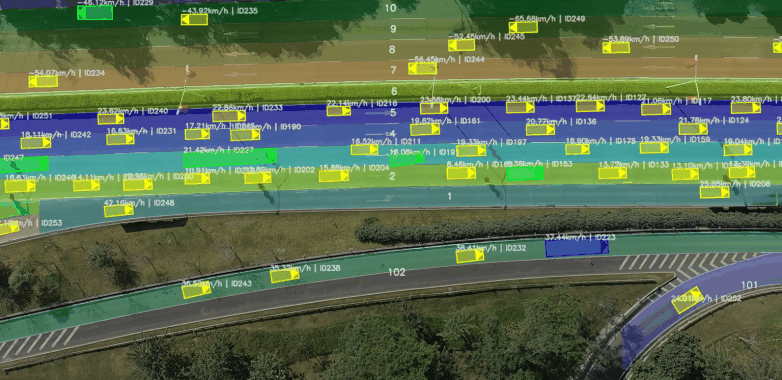

In [7]:
import os
from render_plot import video_to_gif
import os, sys

video_path = "../data/AD4CHE_boundingbox.mp4"
out_dir = "../output/frames/real_data"
n_frames = 20
step_sec = 1
start_sec = 20
crop_top_ratio, crop_bottom_ratio = 0.3, 0.01
crop_left_ratio, crop_right_ratio = 0.1, 0.1
jpg_quality = 80
out_h = 380
prefix = "real_"

# 处理视频并生成GIF
video_to_gif(
    video_path=video_path,
    out_dir=out_dir,
    n_frames=n_frames,
    step_sec=step_sec,
    start_sec=start_sec,
    crop_ratios=(crop_top_ratio, crop_bottom_ratio, crop_left_ratio, crop_right_ratio),
    jpg_quality=jpg_quality,
    out_h=out_h,
    prefix=prefix,
    gif_fps=10
)


## Init sumo view render

In [8]:
import os, traci
from render_plot import SumoMatplotlibRenderer      


def visualize_road(cfg: dict):
    os.makedirs(cfg['output_dir'], exist_ok=True)

    traci.start([
        cfg['sumo_binary'], '-c', cfg['sumocfg_path'],
        '--step-length', '0.1', '--quit-on-end'
    ])

    renderer = SumoMatplotlibRenderer(cfg)

    next_frame_t = cfg['start_record']
    end_t        = next_frame_t + cfg['record_length']
    dt           = 1.0 / cfg['fps']                       # 逻辑帧间隔
    stride       = cfg.get('save_every', 1)               # N 帧渲染一次
    dt_render    = dt * stride

    try:
        while traci.simulation.getMinExpectedNumber() > 0:
            traci.simulationStep()
            sim_t = traci.simulation.getTime()

            if next_frame_t - 1e-4 <= sim_t <= end_t + 1e-4:
                states = renderer.collect_states()
                renderer.render_frame(states, sim_t)
                next_frame_t += dt_render                 # 跳过中间帧

            if sim_t > end_t + 0.1:
                renderer.genrate_gif()
                break
    finally:
        traci.close()
base = dict(
    # --- SUMO & 输出 ---
    sumo_binary="sumo",               # 或 "sumo-gui"
    output_dir="../output",
    pdf_output_dir="pdf",             # 每帧 PDF 子目录
    gif_filename="sim.gif",
    gif_frame_duration=0.20,
    cleanup_frames_after_gif=True,

    # --- 渲染 & 录像 ---
    fig_size=(8, 5),                  # matplotlib figure 尺寸
    view_x=180,                       # x 方向可视宽度(米)
    view_y=80,                        # y 方向可视高度(米)
    fps=10,                           # 逻辑帧率
    record_length=10.0,                # 录制时长（秒）
    save_every=4,                     # 每 N 帧真正渲染一次，≥1
    hist_len=8,                      # 拖影最多保留 len 条
    hist_every=2,                     # 每 hist_every 帧更新一次拖影
)


## Visualize calibrated merge scene

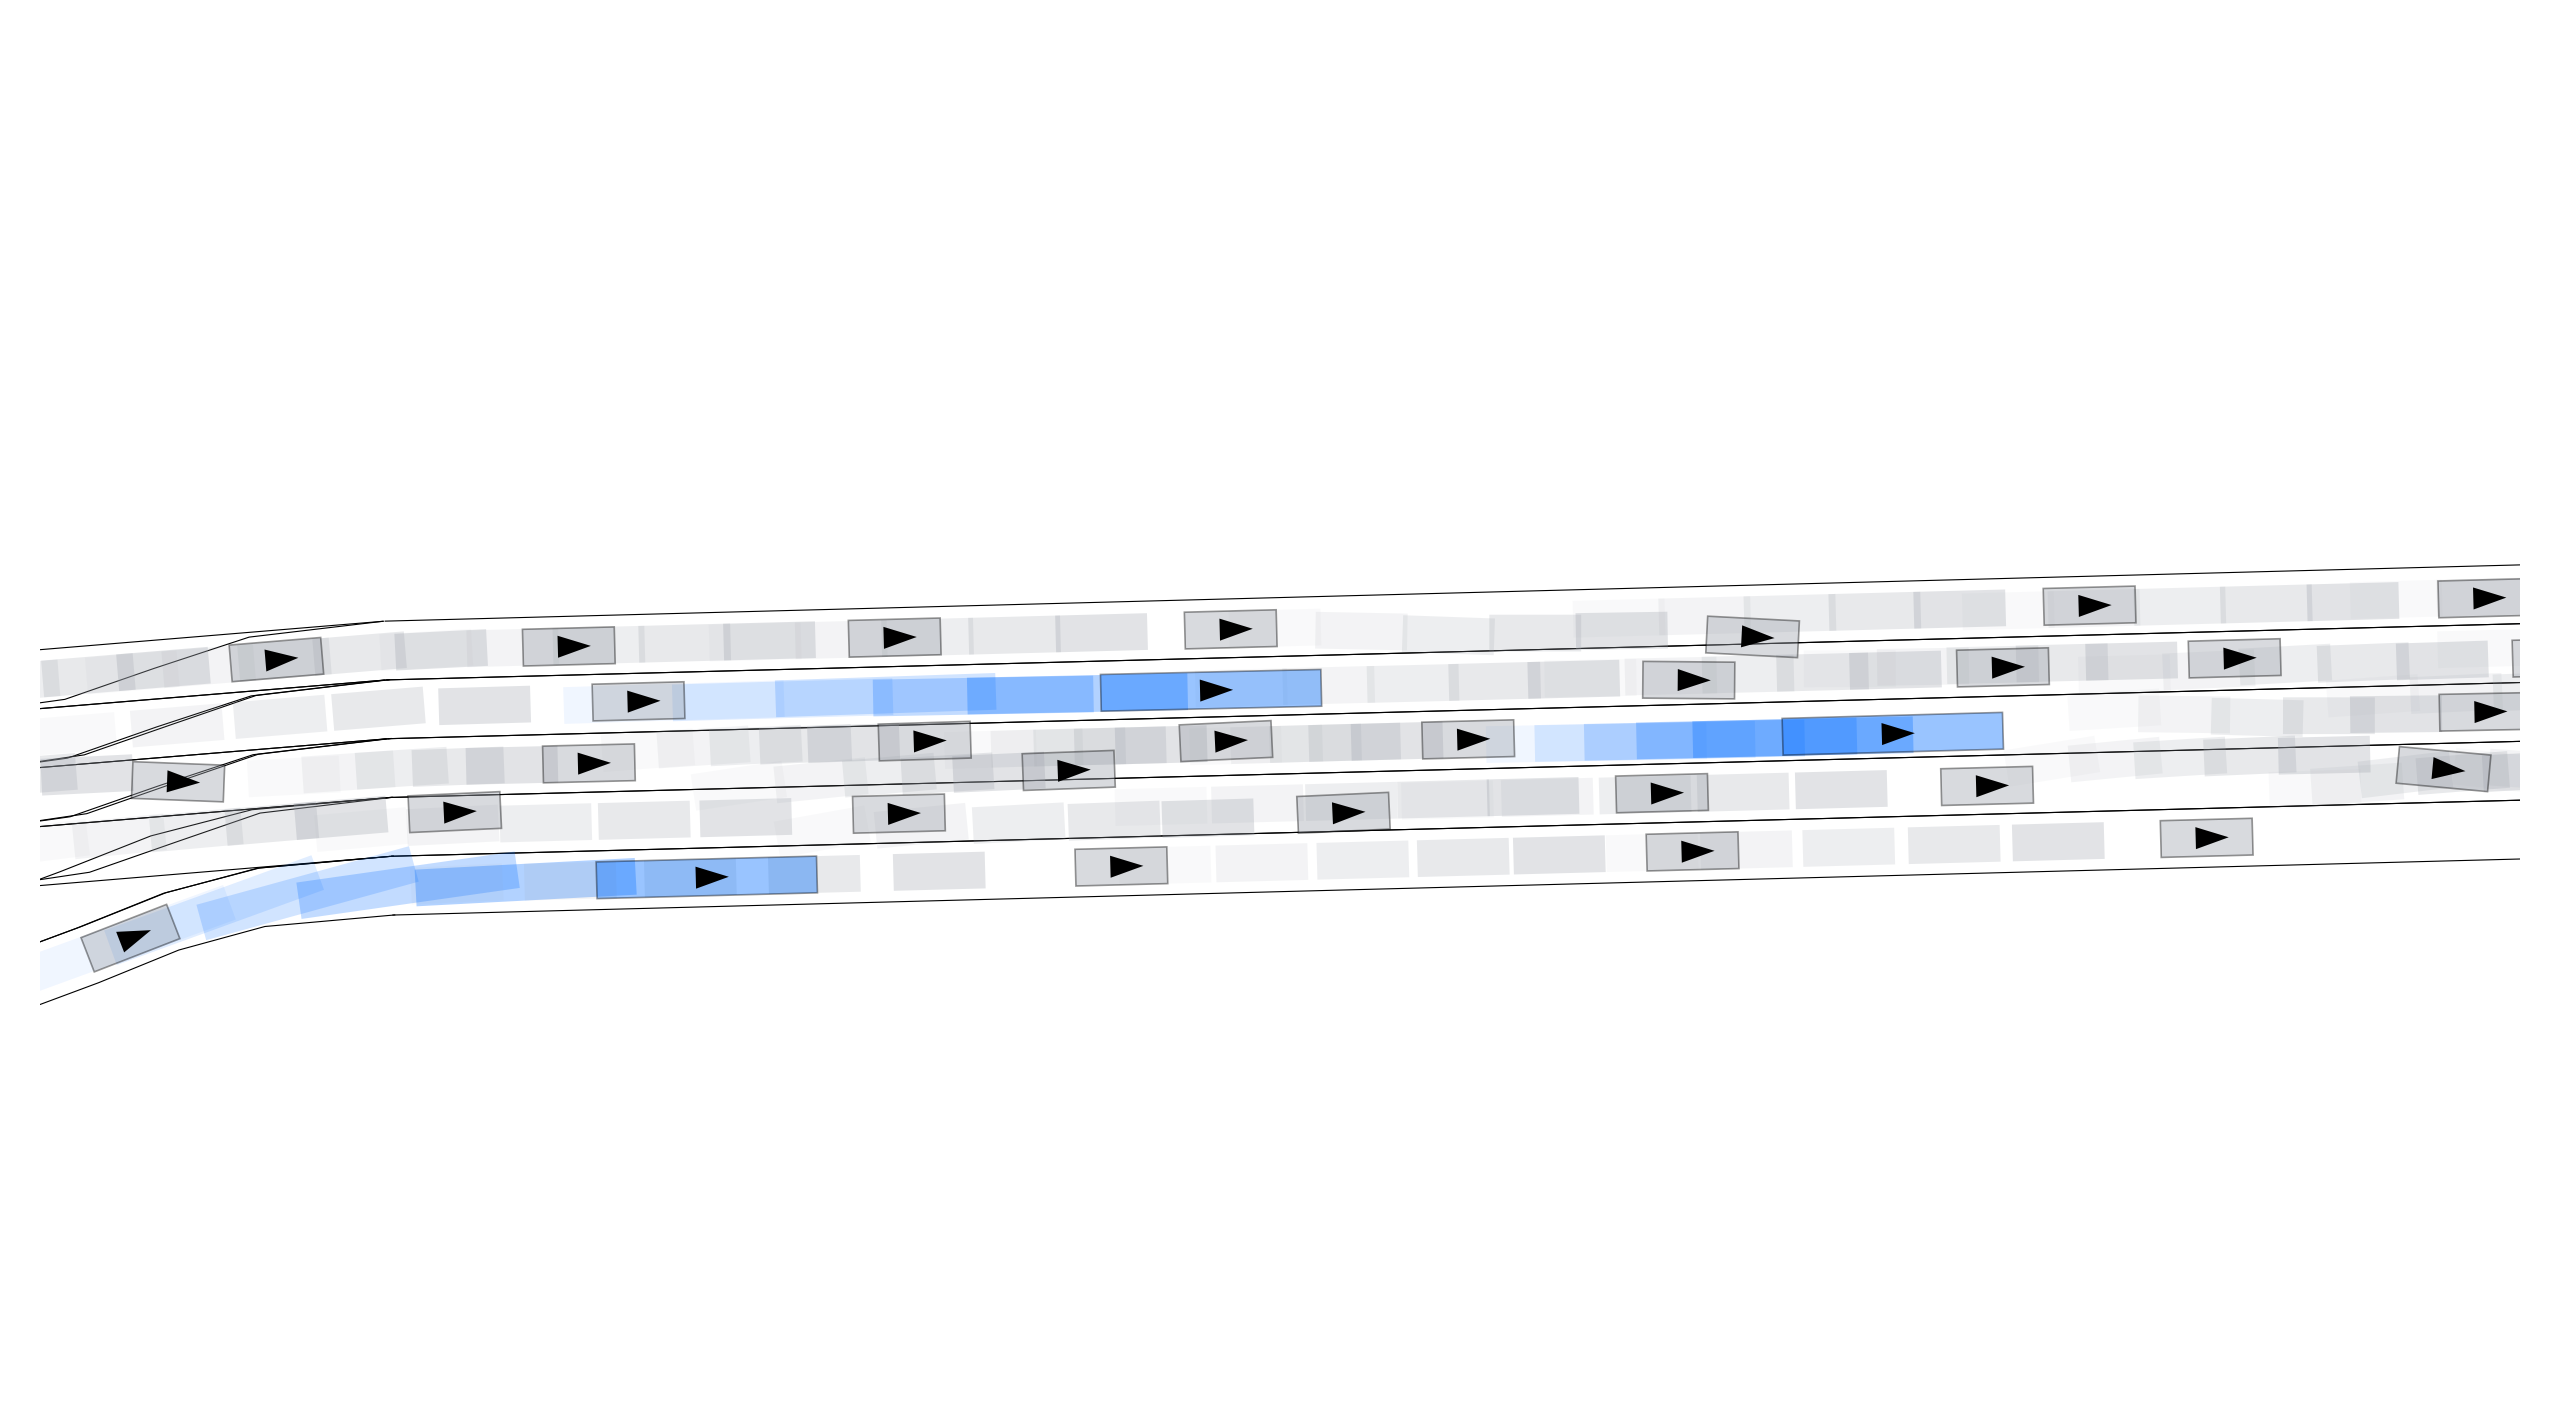

Interrupt signal received, trying to exit gracefully.


KeyboardInterrupt: 

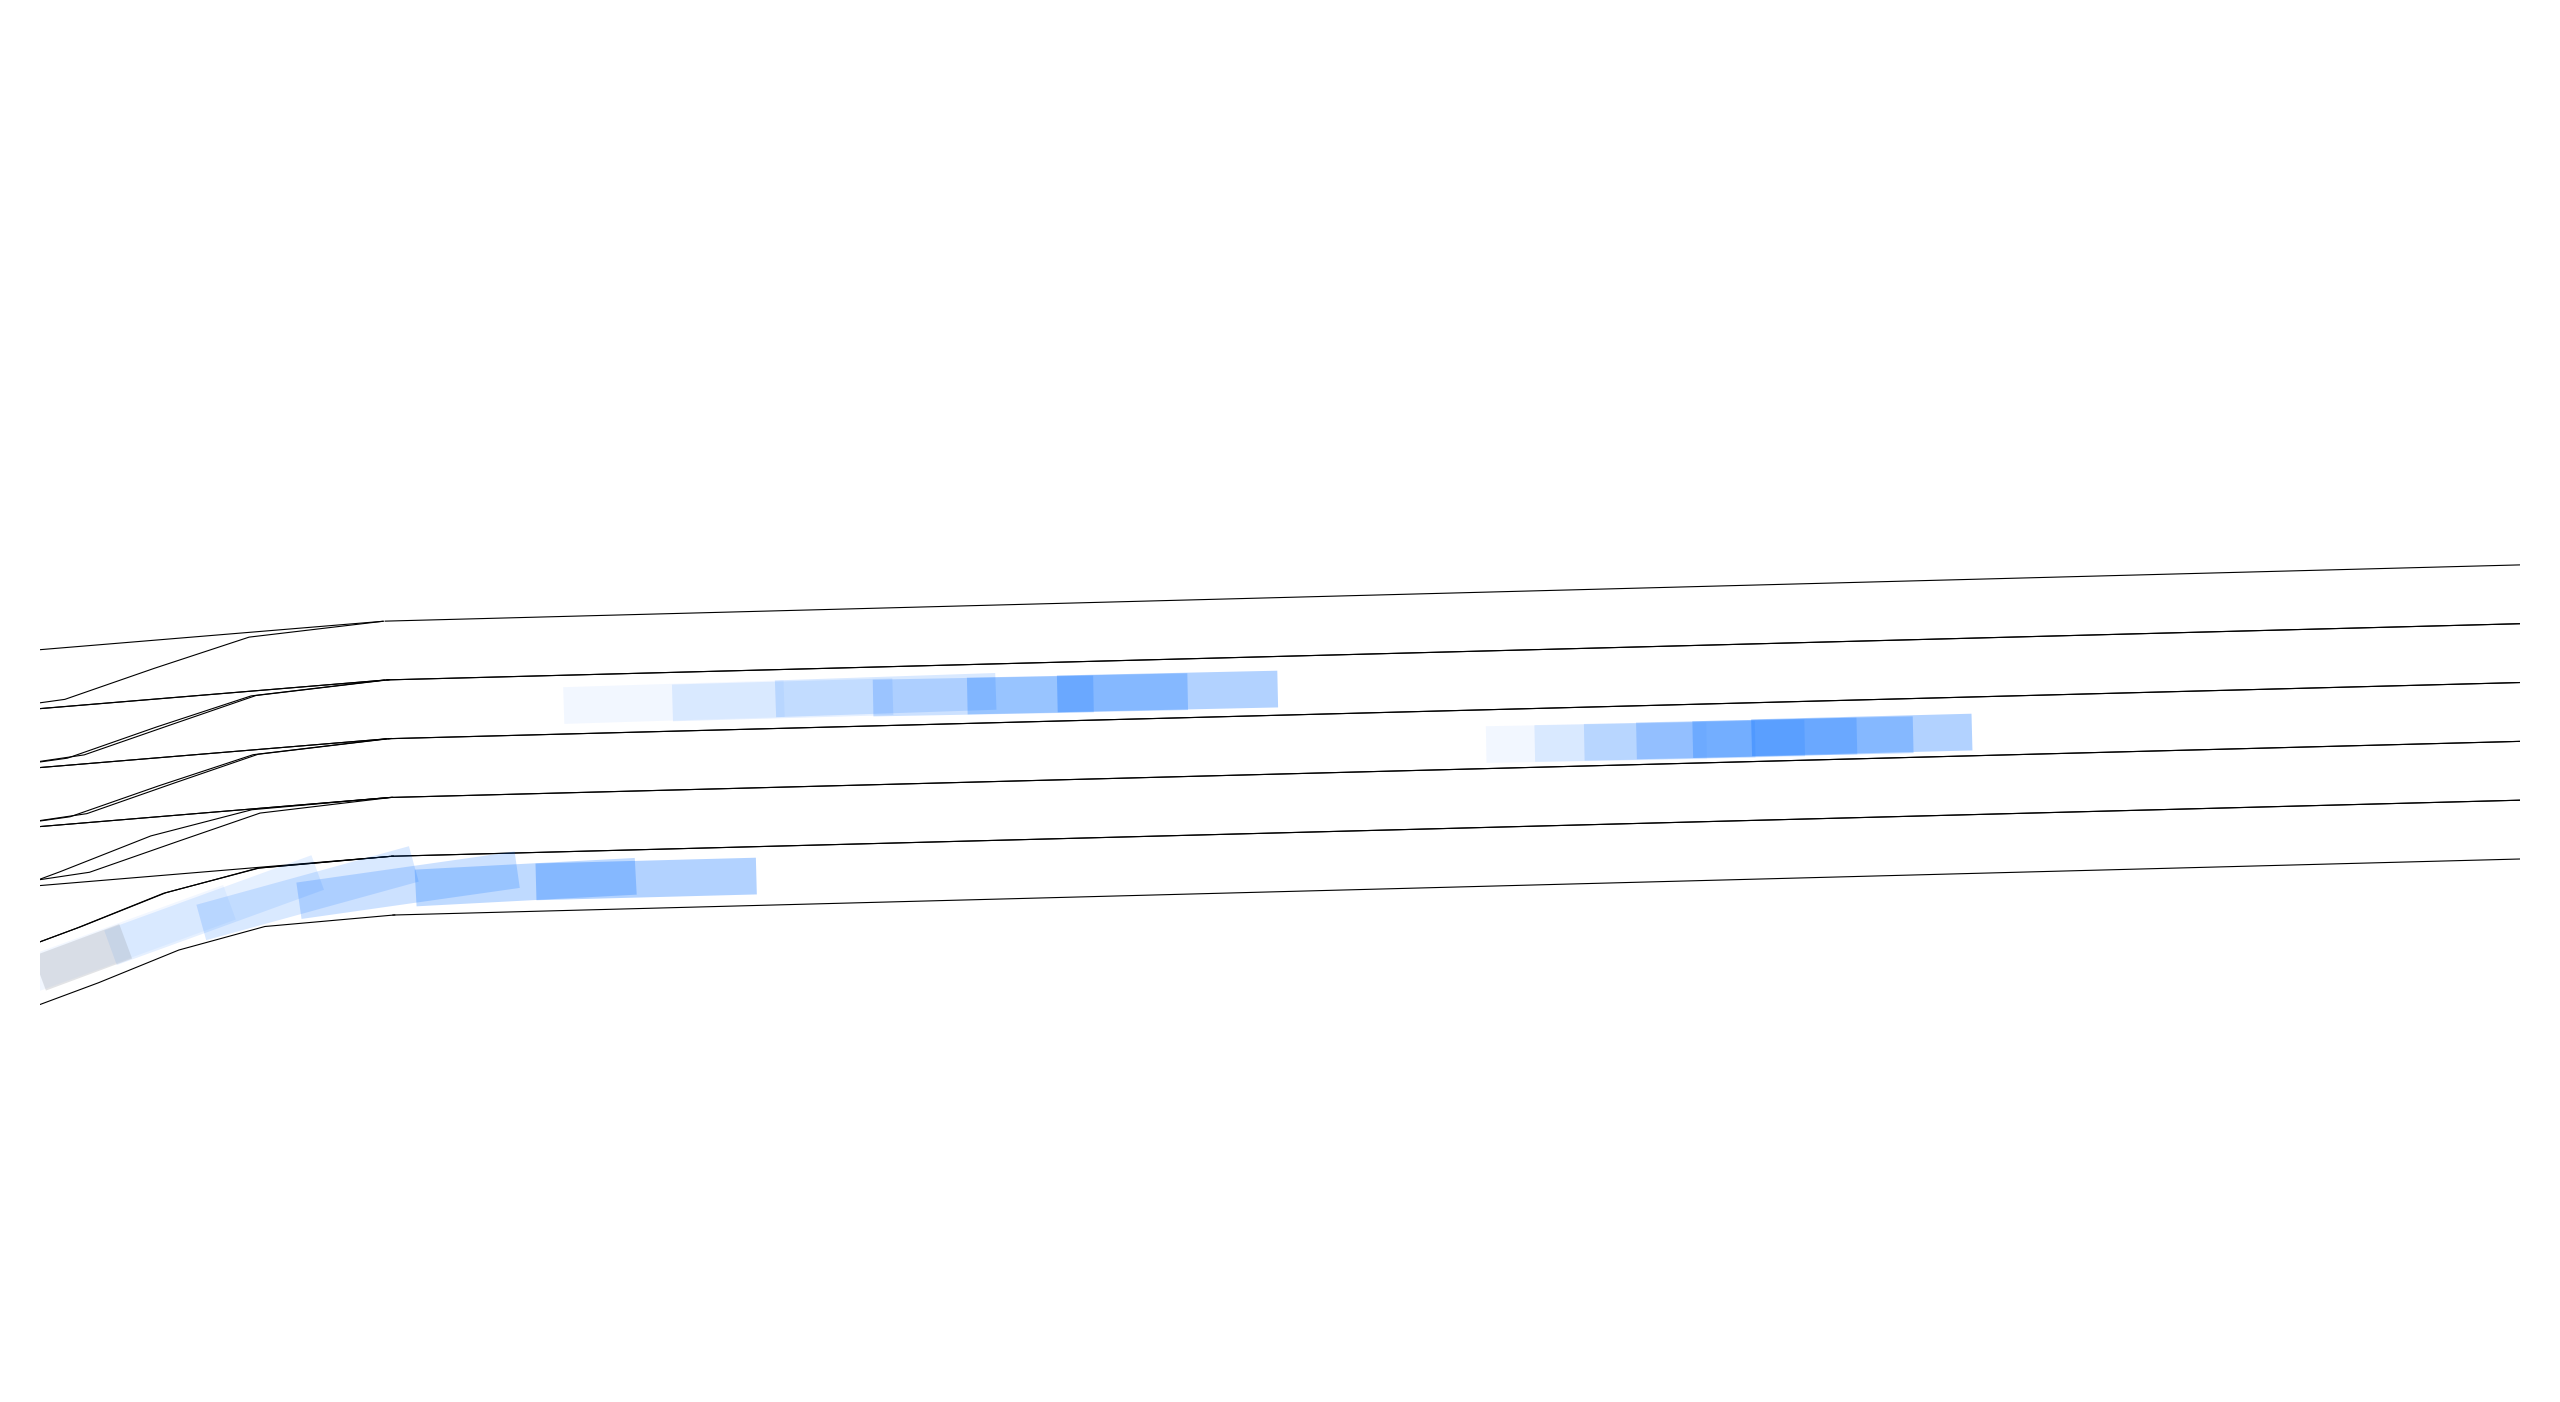

In [9]:
merge_calib = dict(sumocfg_path="../output/data_raw/merge/highway.sumocfg",
                start_record=100.0, pdf_output_dir="frames/merge_pdf", prefix="s1_", gif_filename="frames/gif/merge.gif",
                crop_bottom_ratio=0., crop_left_ratio=0.0, crop_right_ratio=0.5, crop_top_ratio=0.2)
cfg = base.copy()
cfg.update(merge_calib)
visualize_road(cfg)

## Visualize uncalibrated merge scene

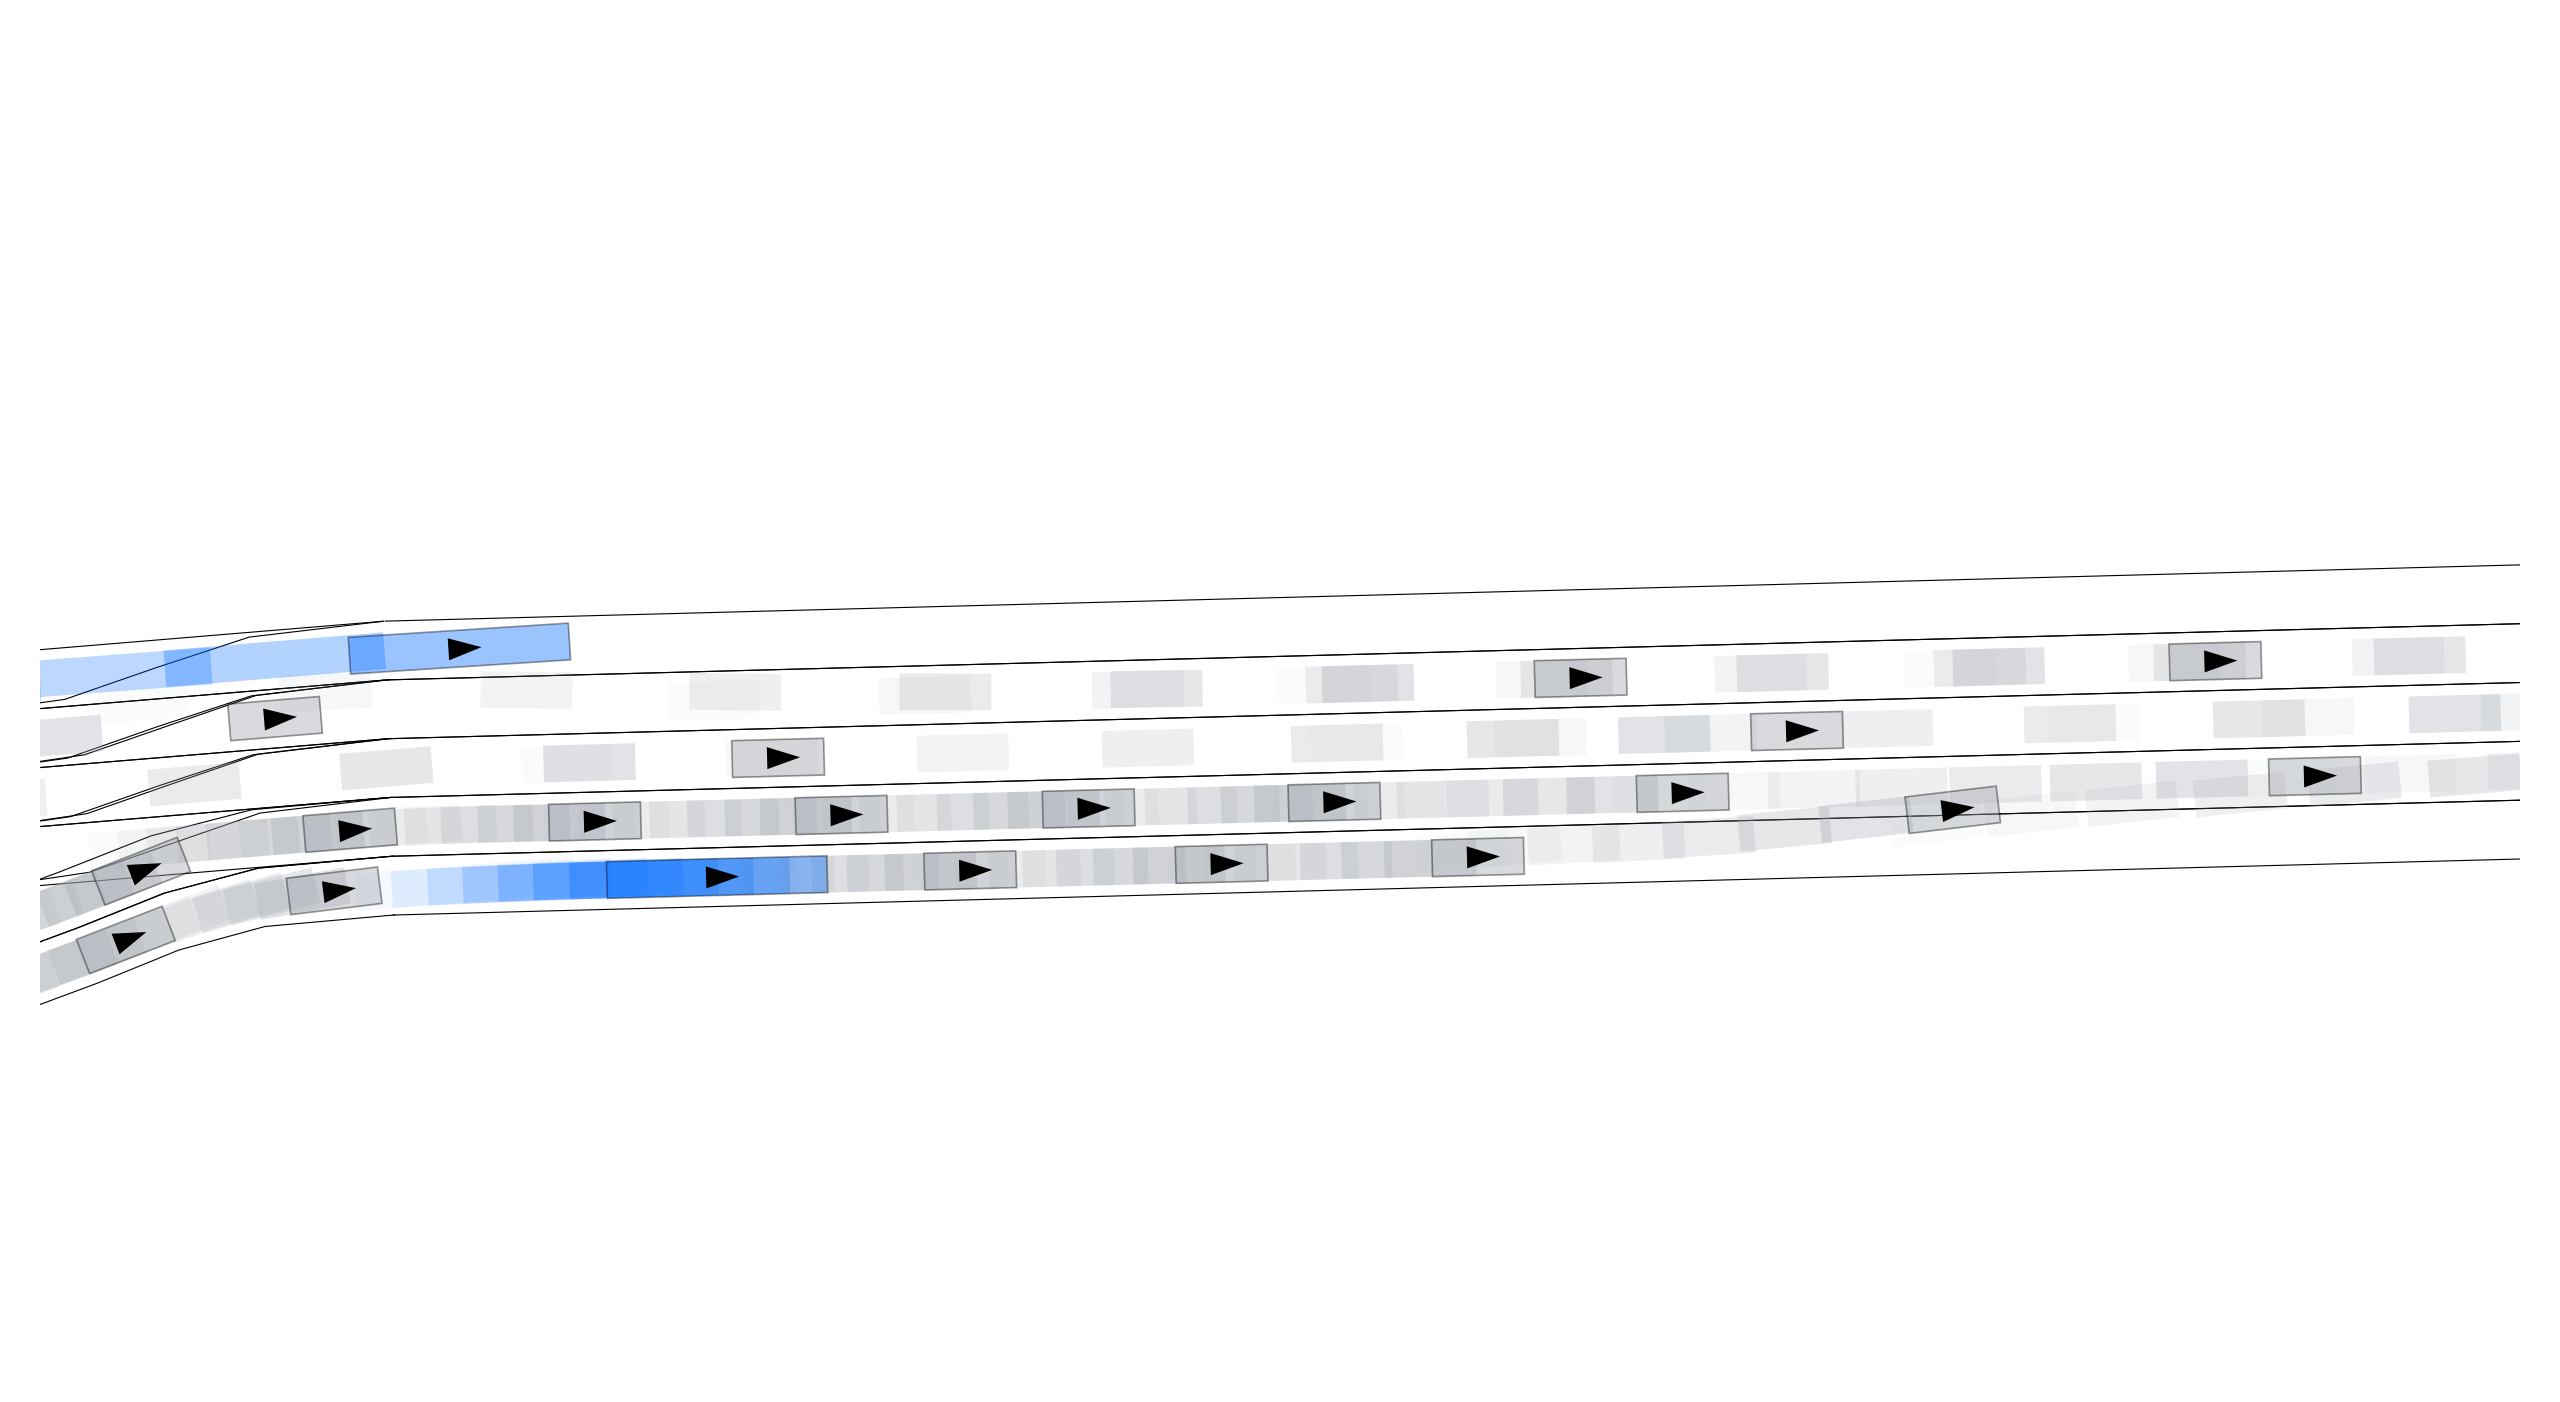

Interrupt signal received, trying to exit gracefully.


KeyboardInterrupt: 

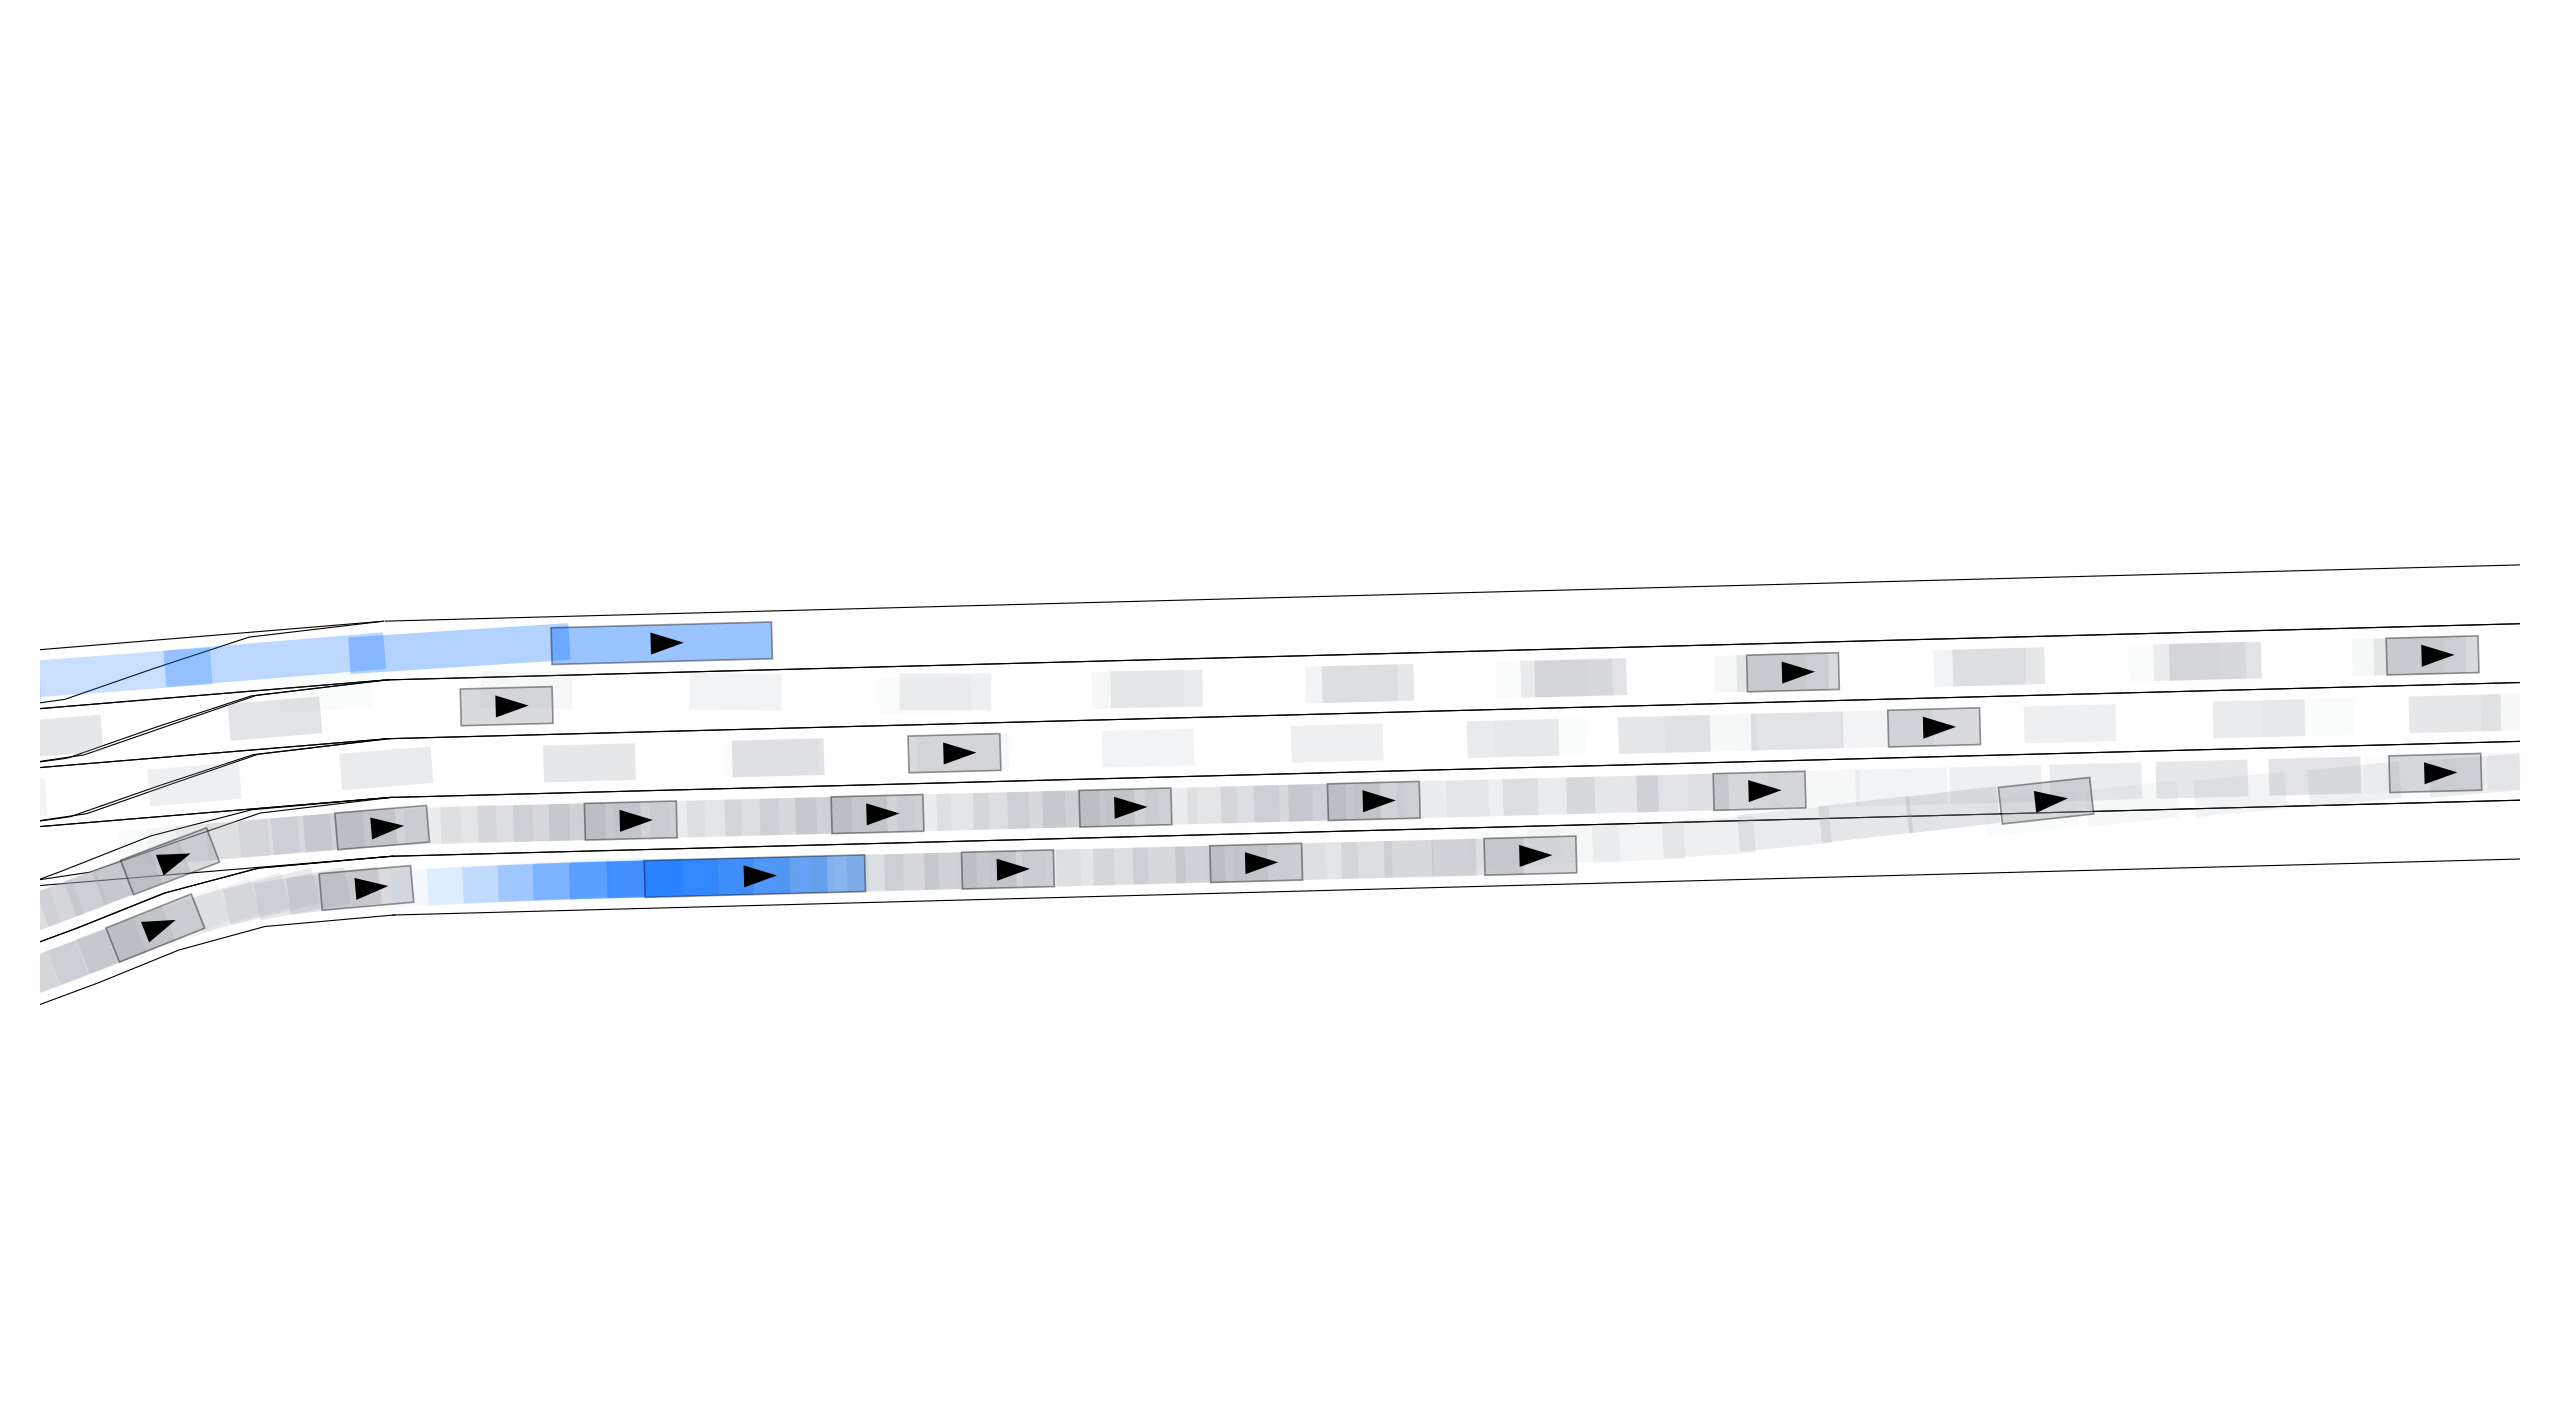

In [10]:
merg_orig = dict(sumocfg_path="../output/data_raw/merge_origin/highway.sumocfg",
                start_record=100.0, pdf_output_dir="frames/merge_ori_pdf", prefix="s1_", gif_filename="frames/gif/merge_ori.gif",hist_len=8,hist_every=1, 
                crop_bottom_ratio=0., crop_left_ratio=0.0, crop_right_ratio=0.5, crop_top_ratio=0.2)
cfg = base.copy()
cfg.update(merg_orig)
visualize_road(cfg)

## Visualize calibrated right scene

In [ ]:
right = dict(sumocfg_path="../output/data_raw/right/highway.sumocfg",
                start_record=200.0, pdf_output_dir="frames/right_pdf", prefix="s1_", gif_filename="frames/gif/right.gif",hist_len=8,hist_every=1, 
                crop_bottom_ratio=0.2, crop_left_ratio=0.6, crop_right_ratio=0.2, view_x=240,        crop_top_ratio=0.3)
cfg = base.copy()
cfg.update(right)
visualize_road(cfg)

## Visualize uncalibrated right scene

In [ ]:
right = dict(sumocfg_path="../output/data_raw/right_origin/highway.sumocfg",
                start_record=200.0, pdf_output_dir="frames/right_origin_pdf", prefix="s1_", gif_filename="frames/gif/right_ori.gif",hist_len=8,hist_every=1, 
                crop_bottom_ratio=0.2, crop_left_ratio=0.6, crop_right_ratio=0.2, view_x=240,        crop_top_ratio=0.3)
cfg = base.copy()
cfg.update(right)
visualize_road(cfg)

## Visualize calibrated stop scene

In [ ]:
right = dict(sumocfg_path="../output/data_raw/stop/highway.sumocfg",
                start_record=180.0, pdf_output_dir="frames/stop_pdf", prefix="s1_", gif_filename="frames/gif/stop.gif",hist_len=8,hist_every=1, 
                crop_bottom_ratio=0.2, crop_left_ratio=0.6, crop_right_ratio=0.2, view_x=240,        crop_top_ratio=0.3)
cfg = base.copy()
cfg.update(right)
visualize_road(cfg)

## Visualize uncalibrated stop scene

In [ ]:
right = dict(sumocfg_path="../output/data_raw/stop_origin/highway.sumocfg",
                start_record=180.0, pdf_output_dir="frames/stop_ori_pdf", prefix="s1_", gif_filename="frames/gif/stop_ori.gif",hist_len=8,hist_every=1, 
                crop_bottom_ratio=0.2, crop_left_ratio=0.6, crop_right_ratio=0.2, view_x=240,        crop_top_ratio=0.3)
cfg = base.copy()
cfg.update(right)
visualize_road(cfg)